In [1]:
# Cálculo de isoyetas y polígonos de thiessen.

import numpy as np
import pandas as pd

from scipy import spatial

from matplotlib import pyplot as plt

import geopandas as gpd

from shapely import geometry

In [3]:
# Dirección de los datos.
path = "../Material/Clases/Examen 1/"

# Nombre de la cuenca.
estaciones_n = "ESTACIONES_NOROESTE.csv"

# Datos de estaciones.
nombre_e = "Estaciones_Guerrero_1980.csv"

In [192]:
# Cargamos la lista de estaciones.
estaciones = pd.read_csv(path + estaciones_n)

# Nombres de archivos
estaciones["ARCHIVO"] = estaciones["ESTACION"].apply(
    lambda x: f"Estacion_{x}__90_dias.csv" )

# Creamos un punto con las coordenadas.
estaciones["geometry"] = None
estaciones["geometry"] = gpd.points_from_xy(
    estaciones["LONGITUD"], estaciones["LATITUD"])

# Creamos un GeoDataFrame.
estaciones = gpd.GeoDataFrame(estaciones, geometry = "geometry", crs = 4326)
# A coordenadas Cónica Conforme de Lambert ITRF92.
estaciones = estaciones.to_crs(6362)

# Actualizamos x, y.
estaciones["x"] = estaciones.centroid.x
estaciones["y"] = estaciones.centroid.y

# Datos.
estaciones

,ESTACION,LATITUD,LONGITUD,ESTADO,MUNICIPIO,ALTITUD,ARCHIVO,geometry,x,y
0,CATAVINIA,29.727222,-114.719167,Baja California,Ensenada,514.000,Estacion_CATAVINIA__90_dias.csv,POINT (1270516.941 2016437.989),1.270517e+06,2.016438e+06
1,EJIDO_NUEVO_LEON,32.414440,-115.192500,Baja California,Mexicali,14.000,Estacion_EJIDO_NUEVO_LEON__90_dias.csv,POINT (1252350.014 2318259.450),1.252350e+06,2.318259e+06
2,ELPINACATE,31.680000,-113.304778,Sonora,Puerto Peñasco,99.561,Estacion_ELPINACATE__90_dias.csv,POINT (1424026.132 2221351.155),1.424026e+06,2.221351e+06
3,ISLA_CORONADO,32.415600,-117.248100,Baja California,Tijuana,76.000,Estacion_ISLA_CORONADO__90_dias.csv,POINT (1058643.571 2337659.122),1.058644e+06,2.337659e+06
4,ISLA_GUADALUPE,28.882800,-118.293100,Baja California,Ensenada,23.000,Estacion_ISLA_GUADALUPE__90_dias.csv,POINT (915764.064 1958404.802),9.157641e+05,1.958405e+06
5,LARUMOROSA,32.272222,-116.205556,Baja California,Tecate,1262.000,Estacion_LARUMOROSA__90_dias.csv,POINT (1155275.080 2311612.307),1.155275e+06,2.311612e+06
6,MEXICALI,32.625833,-115.376111,Baja California,Tecate,0.000,Estacion_MEXICALI__90_dias.csv,POINT (1237234.204 2343374.580),1.237234e+06,2.343375e+06
7,MEXICALI_EMA,32.666670,-115.457778,Baja California,Mexicali,14.000,Estacion_MEXICALI_EMA__90_dias.csv,POINT (1229974.568 2348638.310),1.229975e+06,2.348638e+06
8,PLAYASROSARITO,32.377500,-117.071389,Baja California,Playas de Rosarito,36.900,Estacion_PLAYASROSARITO__90_dias.csv,POINT (1074839.464 2331663.295),1.074839e+06,2.331663e+06
9,PRESAABELARDOLRODRIGUEZTIJUANA,32.447222,-116.908333,Baja California,Tijuana,156.000,Estacion_PRESAABELARDOLRODRIGUEZTIJUANA__90_di...,POINT (1091009.953 2337794.109),1.091010e+06,2.337794e+06


In [193]:
# Graficamos las estaciones.
estaciones.explore()

In [195]:
df = []
df_d = []
ll_l = ["2023-01-01"]
ll = [0] * len(ll_l)

for i in range( estaciones.shape[0] ): 
    df.append( pd.read_csv(path + estaciones.loc[i, "ARCHIVO"],
        skiprows = 9, index_col = "Fecha Local", 
        usecols = ["Fecha Local", "Precipitacion (mm)"]) )
    df[i].index = pd.to_datetime( df[i].index )
    df_d.append( df[i].resample("D").sum().sort_values(
        "Precipitacion (mm)", ascending = False) )
    for j in range( len(ll_l) ):
        k = df_d[i].head(6).index.isin([ll_l[j]]).sum()
        ll[j] += k
    if ll[j] == 0: 
        print(f"Estación sin precipitacion: {estaciones.loc[i, 'ESTACION']}")


print(f"Cantidad de estaciones con precipitacion el {ll_l[0]}: {ll[0]}")
print(f"Total de estaciones: {estaciones.shape[0]}")

Cantidad de estaciones con precipitacion el 2023-01-01: 18
Total de estaciones: 18


In [196]:
# Polígonos de Thiessen

# Creamos los polígonos de Thiessen.
Thiessen = spatial.Voronoi( estaciones[ ["x", "y"] ] )

# Extraemos los polígonos de Thiessen, los convertimos en geometrías
# de Shapely y los agregamos al geoDataFrame de Estaciones.

# Lista de geometrías de Shapely.
Poly_th = []

# Iteramos para cada lista de vértices que forman un polígono.
for i in Thiessen.regions:

    # Creamos la lista de vértices.
    Ver_th = []

    # Saltamos las listas vacías.
    if len(i) == 0: pass
    else:
        # Agregamos cada vértice que corresponde a al polígono de.
        for j in i:
            Ver_th.append( Thiessen.vertices[j] )

        # Agregamos nuevamente el primer vértice para cerrar el polígono.
        Ver_th.append( Ver_th[0] )

        # Convertimos a geometría de shapely.
        Poly_th.append( geometry.Polygon( Ver_th ) )

# Creamos una columna del GeoDataframe con los polígonos de Thiessen.
estaciones["Thiessen"] = Poly_th
# Establecemos como la geometría de trabajo.
estaciones = estaciones.set_geometry("Thiessen")

# Datos.
estaciones

,ESTACION,LATITUD,LONGITUD,ESTADO,MUNICIPIO,ALTITUD,ARCHIVO,geometry,x,y,Thiessen
0,CATAVINIA,29.727222,-114.719167,Baja California,Ensenada,514.000,Estacion_CATAVINIA__90_dias.csv,POINT (1270516.941 2016437.989),1.270517e+06,2.016438e+06,"POLYGON ((1341484.871 2246812.519, 1405348.817..."
1,EJIDO_NUEVO_LEON,32.414440,-115.192500,Baja California,Mexicali,14.000,Estacion_EJIDO_NUEVO_LEON__90_dias.csv,POINT (1252350.014 2318259.450),1.252350e+06,2.318259e+06,"POLYGON ((1341484.871 2246812.519, 1324674.062..."
2,ELPINACATE,31.680000,-113.304778,Sonora,Puerto Peñasco,99.561,Estacion_ELPINACATE__90_dias.csv,POINT (1424026.132 2221351.155),1.424026e+06,2.221351e+06,"POLYGON ((1931745.436 3558576.174, 1405348.817..."
3,ISLA_CORONADO,32.415600,-117.248100,Baja California,Tijuana,76.000,Estacion_ISLA_CORONADO__90_dias.csv,POINT (1058643.571 2337659.122),1.058644e+06,2.337659e+06,"POLYGON ((982869.530 2135697.011, 1187752.631 ..."
4,ISLA_GUADALUPE,28.882800,-118.293100,Baja California,Ensenada,23.000,Estacion_ISLA_GUADALUPE__90_dias.csv,POINT (915764.064 1958404.802),9.157641e+05,1.958405e+06,"POLYGON ((1242317.592 2087332.587, 1350833.696..."
5,LARUMOROSA,32.272222,-116.205556,Baja California,Tecate,1262.000,Estacion_LARUMOROSA__90_dias.csv,POINT (1155275.080 2311612.307),1.155275e+06,2.311612e+06,"POLYGON ((1100127.386 1944711.054, 1205401.234..."
6,MEXICALI,32.625833,-115.376111,Baja California,Tecate,0.000,Estacion_MEXICALI__90_dias.csv,POINT (1237234.204 2343374.580),1.237234e+06,2.343375e+06,"POLYGON ((982869.530 2135697.011, 927290.371 2..."
7,MEXICALI_EMA,32.666670,-115.457778,Baja California,Mexicali,14.000,Estacion_MEXICALI_EMA__90_dias.csv,POINT (1229974.568 2348638.310),1.229975e+06,2.348638e+06,"POLYGON ((1094972.637 2302951.373, 1042094.526..."
8,PLAYASROSARITO,32.377500,-117.071389,Baja California,Playas de Rosarito,36.900,Estacion_PLAYASROSARITO__90_dias.csv,POINT (1074839.464 2331663.295),1.074839e+06,2.331663e+06,"POLYGON ((1074749.334 2356291.876, 1074531.774..."
9,PRESAABELARDOLRODRIGUEZTIJUANA,32.447222,-116.908333,Baja California,Tijuana,156.000,Estacion_PRESAABELARDOLRODRIGUEZTIJUANA__90_di...,POINT (1091009.953 2337794.109),1.091010e+06,2.337794e+06,"POLYGON ((1117457.215 2310748.224, 1197126.945..."


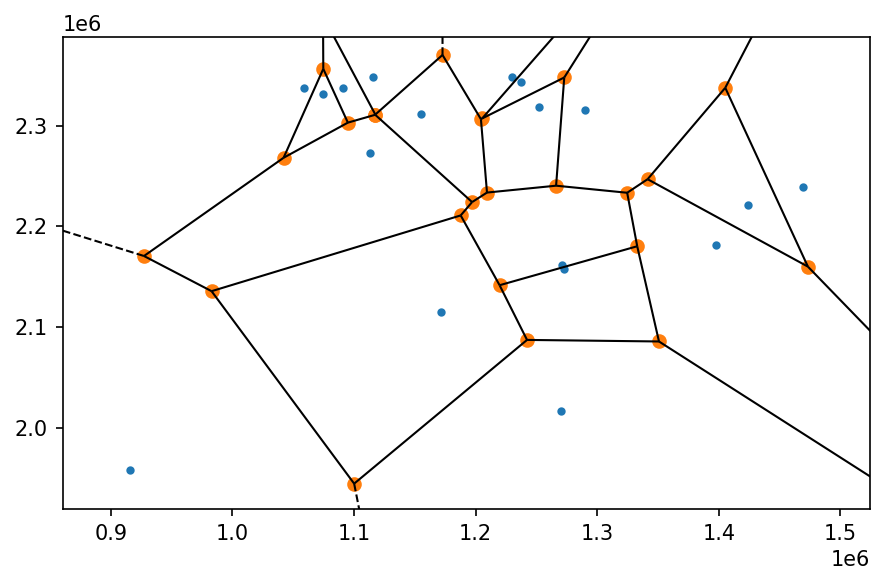

In [197]:
# Polígonos de Thiessen

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_dpi(150) 

# Graficamos la cuenca.
#Cuenca.plot(ax = ax, color = "y")
# Graficamos los polígonos de Thiessen.
spatial.voronoi_plot_2d(Thiessen, ax = ax)

fig.tight_layout()
plt.show()